In [ ]:
# Import library yang diperlukan
import pandas as pd  # Mengimpor library pandas untuk manipulasi data dan analisis
import numpy as np  # Mengimpor library numpy untuk operasi numerik dan array
import matplotlib.pyplot as plt  # Mengimpor matplotlib untuk visualisasi data
import seaborn as sns  # Mengimpor seaborn untuk visualisasi data yang lebih menarik
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Mengimpor fungsi untuk membagi data, pencarian grid, dan validasi silang
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Mengimpor alat untuk encoding label dan penskalaan fitur
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Mengimpor model klasifikasi dari ensemble
from sklearn.svm import SVC  # Mengimpor Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # Mengimpor K-Nearest Neighbors Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix  # Mengimpor metrik evaluasi untuk model

# Mengatur gaya visualisasi menggunakan seaborn
plt.style.use('seaborn-v0_8')  # Mengatur gaya visualisasi matplotlib agar lebih menarik dengan tema seaborn

In [ ]:
# 1. PREPROCESSING DATA
# Membaca dataset
df = pd.read_csv('top2020.csv')

In [ ]:
# Fungsi untuk membersihkan nama kolom
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace('.', '_')
    return df

In [ ]:
# Membersihkan dan mengubah nama kolom
df = clean_column_names(df)  # Memanggil fungsi 'clean_column_names' untuk membersihkan nama kolom ⬤

In [ ]:
# Memeriksa informasi dataset
print("=== Informasi Dataset ===")  # Mencetak judul untuk bagian informasi dataset
print(df.info())  # Mencetak informasi tentang DataFrame 'df', termasuk jumlah entri, tipe data, dan penggunaan memori

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ranking            1000 non-null   int64  
 1   rangking_provinsi  1000 non-null   int64  
 2   nilai_total        1000 non-null   float64
 3   npsn               1000 non-null   object 
 4   sekolah            1000 non-null   object 
 5   provinsi           1000 non-null   object 
 6   kab_kota           1000 non-null   object 
 7   jenis              1000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB
None


In [ ]:
# Memeriksa nilai null
print("\n=== Jumlah Nilai Null ===")  # Mencetak judul untuk bagian pemeriksaan nilai null, dengan baris baru sebelumnya untuk pemisahan
print(df.isnull().sum())  # Mencetak jumlah nilai null untuk setiap kolom dalam DataFrame 'df'


=== Jumlah Nilai Null ===
ranking              0
rangking_provinsi    0
nilai_total          0
npsn                 0
sekolah              0
provinsi             0
kab_kota             0
jenis                0
dtype: int64


In [ ]:
# Statistik deskriptif
print("\n=== Statistik Deskriptif ===")  # Mencetak judul untuk bagian statistik deskriptif, dengan baris baru sebelumnya untuk pemisahan
print(df.describe())  # Mencetak statistik deskriptif untuk setiap kolom numerik dalam DataFrame 'df'


=== Statistik Deskriptif ===
           ranking  rangking_provinsi  nilai_total
count  1000.000000        1000.000000  1000.000000
mean    500.500000          61.988000   533.885154
std     288.819436          52.251508    19.161997
min       1.000000           1.000000   510.509000
25%     250.750000          14.000000   518.690250
50%     500.500000          49.000000   528.793500
75%     750.250000         103.000000   544.879750
max    1000.000000         187.000000   601.683000


In [ ]:
def create_visualizations(df):  # Mendefinisikan fungsi dengan parameter df, yang merupakan DataFrame yang berisi data untuk divisualisasikan
    # Set style plotting
    plt.style.use('seaborn-v0_8')  # Mengatur gaya plotting menggunakan style 'seaborn-v0_8'

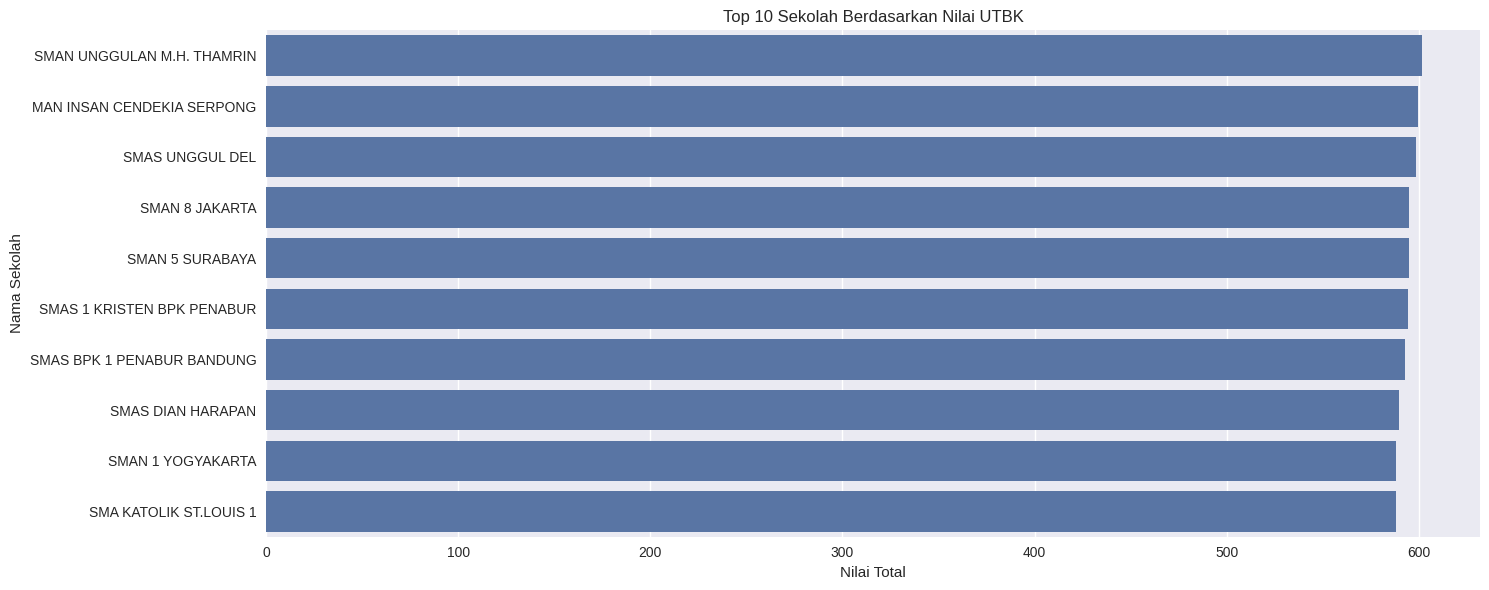

In [ ]:
# 1. Bar Chart - Top 10 Sekolah Berdasarkan Nilai
plt.figure(figsize=(15, 6))  # Mengatur ukuran figure untuk plot, dengan lebar 15 inci dan tinggi 6 inci
top_10_schools = df.nlargest(10, 'nilai_total')  # Mengambil 10 sekolah dengan nilai_total tertinggi dari DataFrame 'df'
sns.barplot(x='nilai_total', y='sekolah', data=top_10_schools)  # Membuat bar chart menggunakan Seaborn
plt.title('Top 10 Sekolah Berdasarkan Nilai UTBK')  # Menambahkan judul pada plot
plt.xlabel('Nilai Total')  # Menambahkan label pada sumbu x
plt.ylabel('Nama Sekolah')  # Menambahkan label pada sumbu y
plt.tight_layout()  # Mengatur layout plot agar lebih rapi dan tidak ada elemen yang terpotong
plt.show()  # Menampilkan plot yang telah dibuat

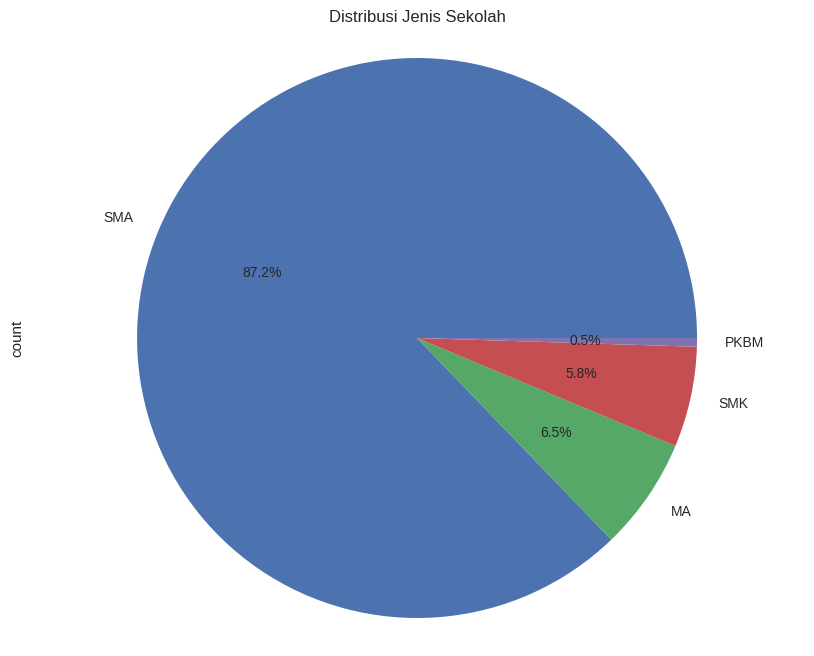

In [ ]:
# 2. Pie Chart - Distribusi Jenis Sekolah
plt.figure(figsize=(10, 8))  # Mengatur ukuran figure untuk plot, dengan lebar 10 inci dan tinggi 8 inci
df['jenis'].value_counts().plot(kind='pie', autopct='%1.1f%%')  # Membuat pie chart berdasarkan distribusi jenis sekolah
plt.title('Distribusi Jenis Sekolah')  # Menambahkan judul pada plot
plt.axis('equal')  # Mengatur sumbu agar pie chart berbentuk lingkaran
plt.show()  # Menampilkan plot yang telah dibuat

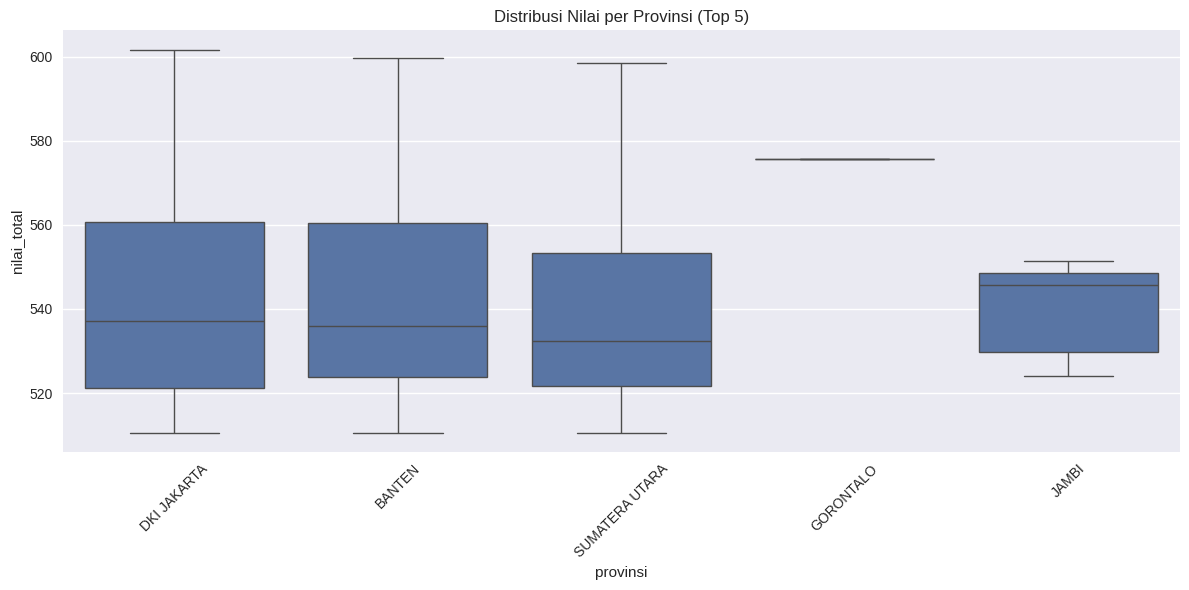

In [ ]:
# 3. Box Plot - Distribusi Nilai per Provinsi (Top 5)
plt.figure(figsize=(12, 6))  # Mengatur ukuran figure untuk plot, dengan lebar 12 inci dan tinggi 6 inci
top_5_provinsi = df.groupby('provinsi')['nilai_total'].mean().nlargest(5).index  # Mengambil 5 provinsi dengan rata-rata nilai_total tertinggi
sns.boxplot(x='provinsi', y='nilai_total', data=df[df['provinsi'].isin(top_5_provinsi)])  # Membuat box plot untuk distribusi nilai_total
plt.title('Distribusi Nilai per Provinsi (Top 5)')  # Menambahkan judul pada plot
plt.xticks(rotation=45)  # Memutar label sumbu x sebesar 45 derajat untuk meningkatkan keterbacaan
plt.tight_layout()  # Mengatur layout plot agar lebih rapi dan tidak ada elemen yang terpotong
plt.show()  # Menampilkan plot yang telah dibuat

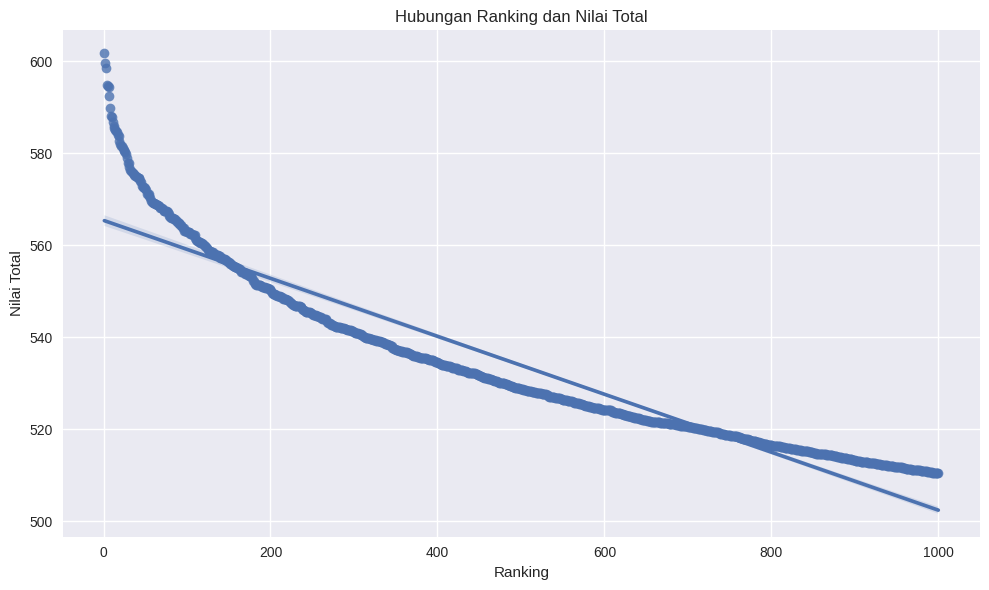

In [ ]:
# 4. Scatter Plot dengan Regression Line
plt.figure(figsize=(10, 6))  # Mengatur ukuran figure untuk plot, dengan lebar 10 inci dan tinggi 6 inci
sns.regplot(x='ranking', y='nilai_total', data=df)  # Membuat scatter plot dengan garis regresi
plt.title('Hubungan Ranking dan Nilai Total')  # Menambahkan judul pada plot
plt.xlabel('Ranking')  # Menambahkan label pada sumbu x
plt.ylabel('Nilai Total')  # Menambahkan label pada sumbu y
plt.tight_layout()  # Mengatur layout plot agar rapi dan tidak ada elemen yang terpotong
plt.show()  # Menampilkan plot yang telah dibuat

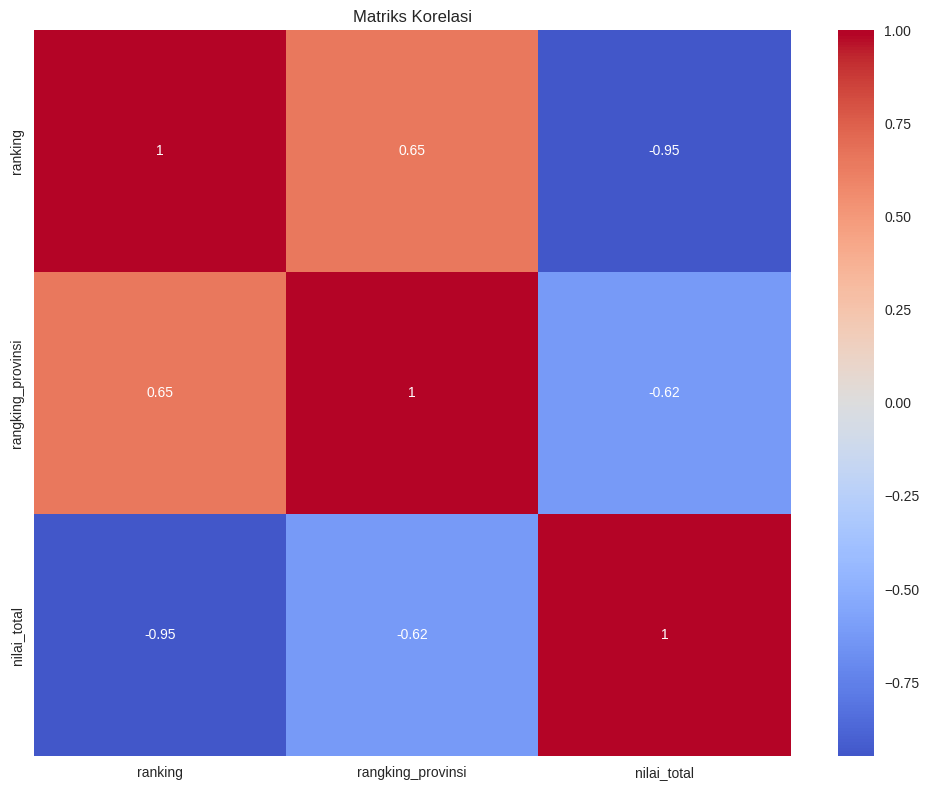

In [ ]:
# Heatmap Korelasi
plt.figure(figsize=(10, 8))  # Mengatur ukuran figure untuk plot, dengan lebar 10 inci dan tinggi 8 inci
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Mengambil kolom-kolom numerik dari DataFrame 'df'
correlation_matrix = df[numeric_cols].corr()  # Menghitung matriks korelasi untuk kolom-kolom numerik
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)  # Membuat heatmap dari matriks korelasi
plt.title('Matriks Korelasi')  # Menambahkan judul pada plot
plt.tight_layout()  # Mengatur layout plot agar lebih rapi dan tidak ada elemen yang terpotong
plt.show()  # Menampilkan plot yang telah dibuat

In [ ]:
# Membuat visualisasi
create_visualizations(df)

In [ ]:
# 3. PREPROCESSING UNTUK MACHINE LEARNING

def prepare_data_for_ml(df):
    # Label encoding untuk variabel kategorikal
    le = LabelEncoder() # Membuat instance dari LabelEncoder untuk mengubah variabel kategorikal menjadi numerik
    df_ml = df.copy() # Membuat salinan dari DataFrame asli untuk menghindari perubahan pada data asli

    categorical_columns = ['provinsi', 'kab_kota', 'jenis'] # Mendefinisikan kolom-kolom kategorikal yang akan di-encode
    for col in categorical_columns: # Melakukan iterasi untuk setiap kolom dalam daftar kolom kategorikal
        df_ml[f'{col}_encoded'] = le.fit_transform(df_ml[col]) # Mengubah kolom kategorikal menjadi numerik dan menyimpannya dalam kolom baru

            # Memilih fitur untuk model
    features = ['provinsi_encoded', 'kab_kota_encoded', 'jenis_encoded', 'nilai_total']
    X = df_ml[features] # Mendefinisikan daftar fitur yang akan digunakan dalam model

        # Membuat target variable (klasifikasi top 100 atau tidak)
    y = (df_ml['ranking'] <= 100).astype(int) # Membuat variabel target 'y' yang bernilai 1 jika ranking <= 100, dan 0 jika sebaliknya

    # Normalisasi fitur
    scaler = StandardScaler() # Membuat instance dari StandardScaler untuk normalisasi fitur
    X_scaled = scaler.fit_transform(X) # Menghitung rata-rata dan deviasi standar dari fitur

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, # Membagi data menjadi set pelatihan dan set pengujian
                                                        test_size=0.2, # Menggunakan 20% data untuk pengujian
                                                        random_state=42, # Menetapkan seed untuk reproduktifitas
                                                        stratify=y) # Memastikan proporsi kelas target terjaga

    return X_train, X_test, y_train, y_test, features # Mengembalikan data yang telah diproses untuk digunakan dalam pelatihan model

In [ ]:
# 4. MODEL MACHINE LEARNING

def train_and_evaluate_models(X_train, X_test, y_train, y_test): # Mendefinisikan fungsi untuk melatih dan mengevaluasi model
    # Inisialisasi model
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'KNN': KNeighborsClassifier()
    }

    # Dictionary untuk menyimpan hasil
    results = {} # Membuat dictionary kosong untuk menyimpan hasil evaluasi model

    # Melatih dan mengevaluasi setiap model
    for name, model in models.items(): # Iterasi melalui setiap model dalam dictionary
        print(f"\nEvaluasi Model: {name}") # Mencetak nama model yang sedang dievaluasi

        # Melatih model
        model.fit(X_train, y_train) # Melatih model menggunakan data pelatihan

        # Prediksi
        y_pred = model.predict(X_test) # Menggunakan model untuk memprediksi label pada data pengujian
        y_pred_proba = model.predict_proba(X_test)[:, 1] # Menghitung probabilitas prediksi untuk kelas positif

        # Evaluasi metrik
        results[name] = { # Menyimpan hasil evaluasi dalam dictionary
            'Accuracy': accuracy_score(y_test, y_pred), # Menghitung akurasi
            'Precision': precision_score(y_test, y_pred), # Menghitung presisi
            'Recall': recall_score(y_test, y_pred), # Menghitung recall
            'F1': f1_score(y_test, y_pred), # Menghitung F1 score
            'AUC': roc_auc_score(y_test, y_pred_proba) # Menghitung AUC
        }

        # Print hasil
        for metric, value in results[name].items(): # Iterasi melalui metrik dan nilainya
            print(f"{metric}: {value:.4f}") # Mencetak metrik dengan format 4 desimal

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    return results, models

In [ ]:
# 5. HYPERPARAMETER TUNING

def perform_hyperparameter_tuning(X_train, y_train, best_models): # Mendefinisikan fungsi untuk melakukan tuning hyperparameter
    # Parameter grid untuk Random Forest
    rf_param_grid = { # Mendefinisikan grid parameter untuk model Random Forest
        'n_estimators': [100, 200, 300], # Jumlah pohon dalam hutan
        'max_depth': [10, 20, 30], # Kedalaman maksimum setiap pohon
        'min_samples_split': [2, 5, 10], # Jumlah minimum sampel yang diperlukan untuk membagi node
        'min_samples_leaf': [1, 2, 4] # Jumlah minimum sampel yang diperlukan untuk menjadi daun
    }

    # Parameter grid untuk Gradient Boosting
    gb_param_grid = { # Mendefinisikan grid parameter untuk model Gradient Boosting
        'n_estimators': [100, 200, 300], # Jumlah pohon dalam model boosting
        'learning_rate': [0.01, 0.1, 0.3], # Kecepatan pembelajaran
        'max_depth': [3, 4, 5], # Kedalaman maksimum setiap pohon
        'min_samples_split': [2, 4] # Jumlah minimum sampel yang diperlukan untuk membagi node
    }

    # Dictionary untuk menyimpan hasil
    tuned_models = {} # Membuat dictionary kosong untuk menyimpan model yang telah dituning

    # Random Forest tuning
    print("\nTuning Random Forest...") # Mencetak pesan bahwa proses tuning untuk Random Forest dimulai
    rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), # Membuat objek GridSearchCV untuk tuning Random Forest
                          rf_param_grid,
                          cv=5, # Menggunakan 5-fold cross-validation
                          scoring='accuracy', # Menggunakan akurasi sebagai metrik evaluasi
                          n_jobs=-1)
    rf_grid.fit(X_train, y_train) # Melatih model dengan data pelatihan
    print("Best parameters:", rf_grid.best_params_) # Mencetak parameter terbaik yang ditemukan
    print("Best score:", rf_grid.best_score_) # Mencetak akurasi terbaik yang ditemukan
    tuned_models['Random Forest'] = rf_grid.best_estimator_ # Menyimpan model terbaik dalam dictionary

    # Gradient Boosting tuning
    print("\nTuning Gradient Boosting...") # Mencetak pesan bahwa proses tuning untuk Gradient Boosting dimulai
    gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), # Membuat objek GridSearchCV untuk tuning Gradient Boosting
                          gb_param_grid,
                          cv=5, # Menggunakan 5-fold cross-validation
                          scoring='accuracy', # Menggunakan akurasi sebagai metrik evaluasi
                          n_jobs=-1)
    gb_grid.fit(X_train, y_train) # Melatih model dengan data pelatihan
    print("Best parameters:", gb_grid.best_params_) # Mencetak parameter terbaik
    print("Best score:", gb_grid.best_score_) # Mencetak akurasi terbaik
    tuned_models['Gradient Boosting'] = gb_grid.best_estimator_ # Menyimpan model dictionary

    return tuned_models


=== Evaluasi Model Awal ===

Evaluasi Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
AUC: 1.0000


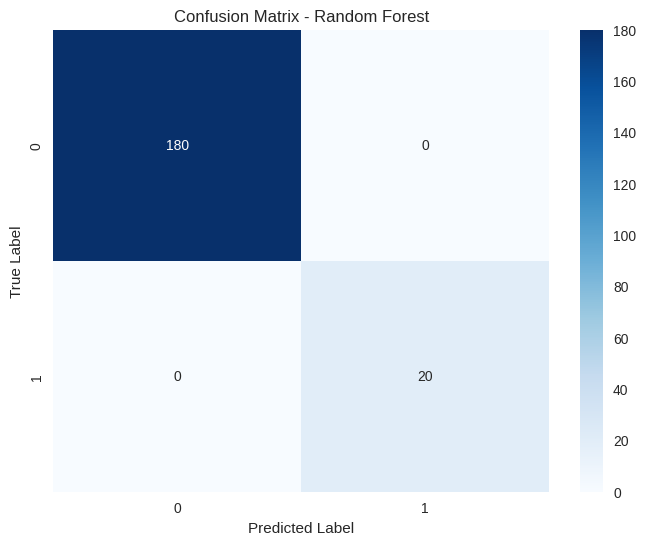


Evaluasi Model: Gradient Boosting
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
AUC: 1.0000


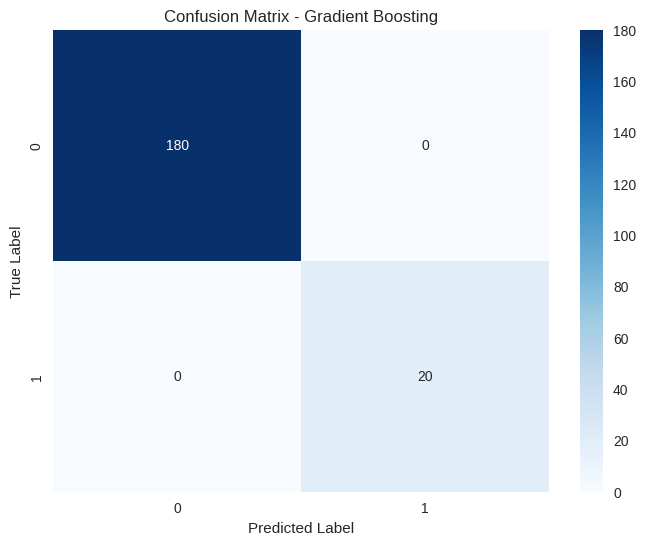


Evaluasi Model: SVM
Accuracy: 0.9900
Precision: 0.9500
Recall: 0.9500
F1: 0.9500
AUC: 0.9994


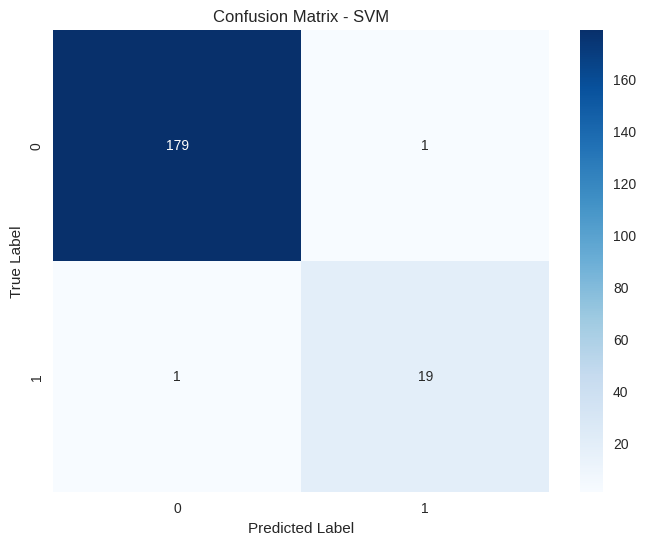


Evaluasi Model: KNN
Accuracy: 0.9750
Precision: 0.8947
Recall: 0.8500
F1: 0.8718
AUC: 0.9974


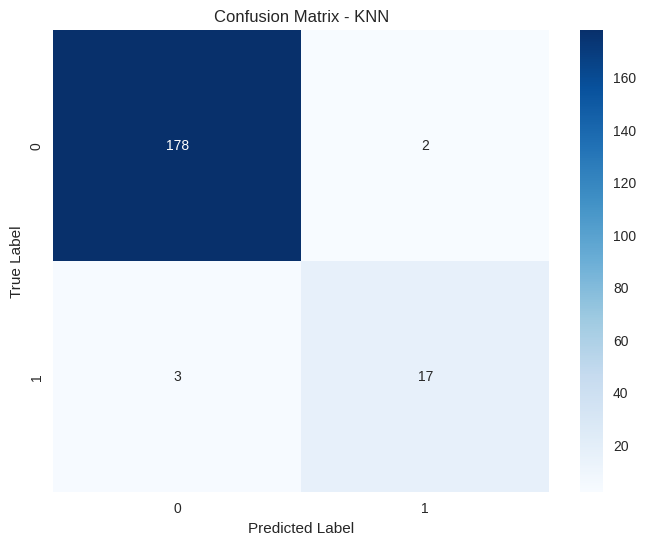


Dua Model Terbaik:

Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
AUC: 1.0000

Gradient Boosting:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
AUC: 1.0000

=== Hyperparameter Tuning ===

Tuning Random Forest...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.99875

Tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 1.0

=== Evaluasi Model Setelah Tuning ===

Evaluasi Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
AUC: 1.0000


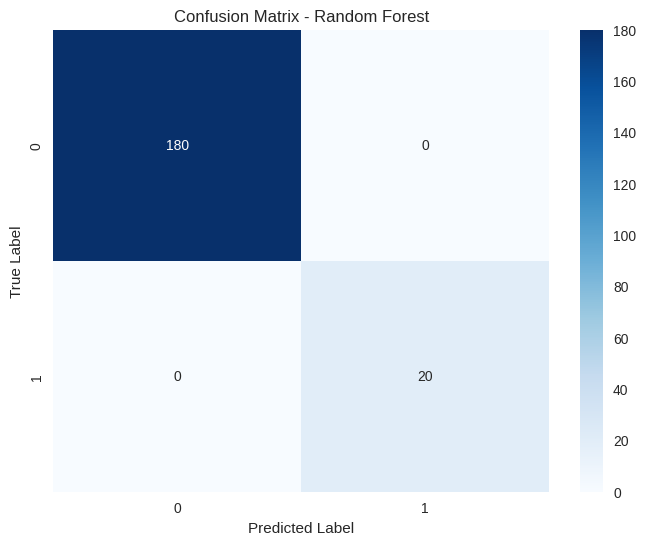


Evaluasi Model: Gradient Boosting
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
AUC: 1.0000


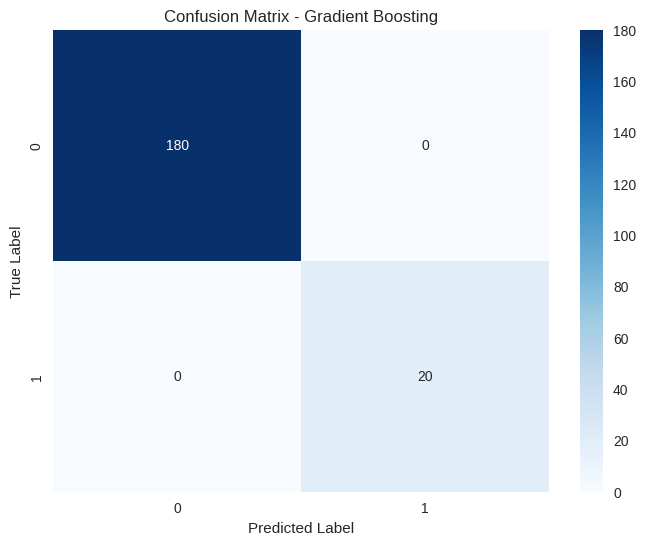


Evaluasi Model: SVM
Accuracy: 0.9900
Precision: 0.9500
Recall: 0.9500
F1: 0.9500
AUC: 0.9994


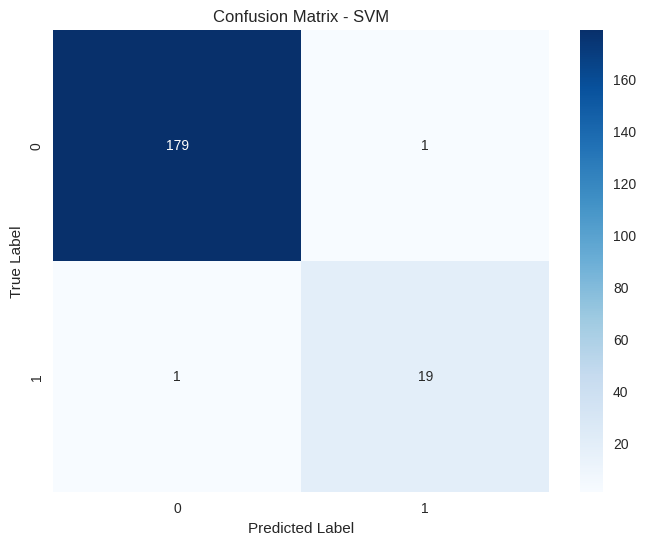


Evaluasi Model: KNN
Accuracy: 0.9750
Precision: 0.8947
Recall: 0.8500
F1: 0.8718
AUC: 0.9974


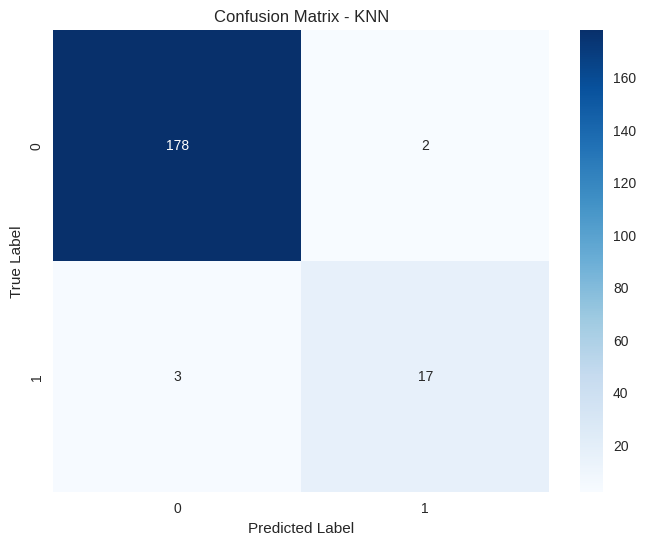

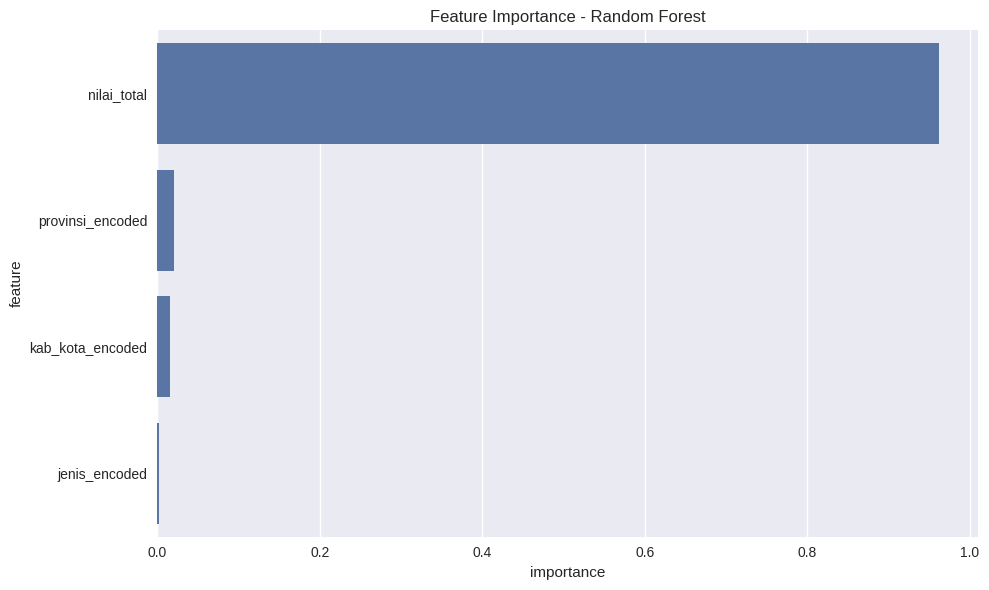

In [ ]:
# 6. EKSEKUSI SELURUH PROSES

if __name__ == "__main__":
    # Prepare data
    X_train, X_test, y_train, y_test, features = prepare_data_for_ml(df) # Mempersiapkan data untuk machine learning

    # Train and evaluate initial models
    print("\n=== Evaluasi Model Awal ===")
    results, models = train_and_evaluate_models(X_train, X_test, y_train, y_test) # Melatih dan mengevaluasi model awal

    # Identify best models based on F1 score
    best_models = dict(sorted(results.items(), key=lambda x: x[1]['F1'], reverse=True)[:2]) # Mengidentifikasi dua model terbaik berdasarkan F1 score
    print("\nDua Model Terbaik:")
    for name, metrics in best_models.items(): # Iterasi melalui model terbaik
        print(f"\n{name}:") # Mencetak nama model
        for metric, value in metrics.items(): # Iterasi melalui metrik untuk model
            print(f"{metric}: {value:.4f}") # Mencetak metrik dengan format 4 desimal

    # Perform hyperparameter tuning on best models
    print("\n=== Hyperparameter Tuning ===")
    tuned_models = perform_hyperparameter_tuning(X_train, y_train, best_models) # Melakukan tuning hyperparameter pada model terbaik

    # Final evaluation of tuned models
    print("\n=== Evaluasi Model Setelah Tuning ===")
    final_results, _ = train_and_evaluate_models(X_train, X_test, y_train, y_test) # Melatih dan mengevaluasi model yang telah dituning

    # Feature importance for Random Forest (best model)
    if 'Random Forest' in tuned_models: # Memeriksa apakah model Random Forest ada dalam model yang telah dituning
        rf_model = tuned_models['Random Forest'] # Mengambil model Random Forest yang telah dituning
        feature_importance = pd.DataFrame({ # Membuat DataFrame untuk menyimpan fitur
            'feature': features, # Menyimpan fitur
            'importance': rf_model.feature_importances_# Menyimpan nilai fitur dari model
        })
        feature_importance = feature_importance.sort_values('importance', ascending=False) # Mengurutkan fitur berdasarkan pentingnya

        plt.figure(figsize=(10, 6)) # Mengatur ukuran figure
        sns.barplot(x='importance', y='feature', data=feature_importance) # Membuat plot batang untuk pentingnya fitur
        plt.title('Feature Importance - Random Forest') # Menambahkan judul pada plot
        plt.tight_layout() # Mengatur layout agar rapi
        plt.show() # Menampilkan plot